# Анализ показателей дошкольного образования
Этот ноутбук выполняет загрузку, обработку, анализ и визуализацию данных из файла `pokazateli_DO.xlsx`.

План анализа:
1. Загрузка и исследование Excel-файла.
2. Извлечение ключевых листов и показателей.
3. Анализ динамики численности воспитанников.
4. Анализ роста числа компьютеров в учреждениях.
5. Визуализация тенденций.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Загружаем Excel-файл
file_path = 'pokazateli_DO.xlsx'

xl = pd.ExcelFile(file_path)
print('Листы в файле:', xl.sheet_names)

Листы в файле: ['Содержание', '1', '2', '3', '4', '5', '6', '7', '8', '9']


     Год  Численность, тыс. человек
0   2014                     6813.6
1   2015                     7151.6
2   2016                     7342.9
3   2017                     7477.9
4   2018                     7582.4
5   2019                     7606.7
6   2020                     7442.9
7   2021                     7340.6
8   2022                     7008.1
9   2023                     6665.0
10  2024                     6385.3


/tmp/ipykernel_67921/1461186075.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  years_data = {int(years_row[i]): data_row[i] for i in range(len(years_row)) if pd.notna(years_row[i]) and pd.notna(data_row[i])}


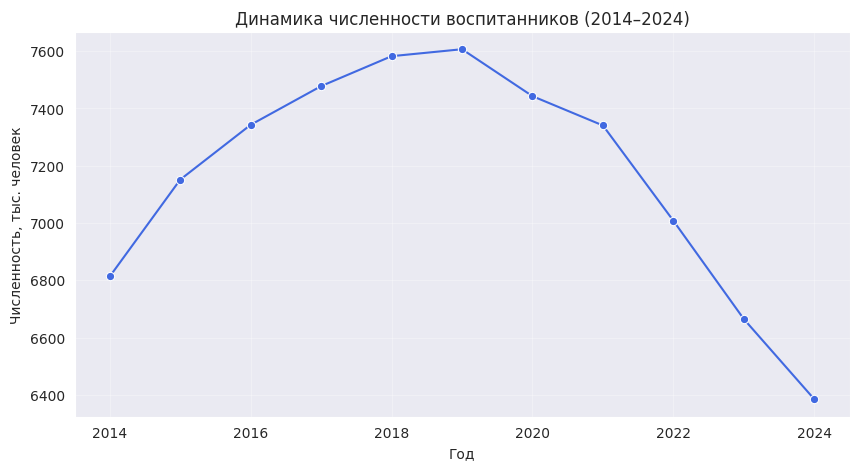

In [2]:
# Анализ численности воспитанников

df1 = pd.read_excel(file_path, sheet_name='1')
years_row = df1.iloc[2]
data_row = df1.iloc[3]

years_data = {int(years_row[i]): data_row[i] for i in range(len(years_row)) if pd.notna(years_row[i]) and pd.notna(data_row[i])}
years_data = dict(sorted(years_data.items()))

# Преобразуем в DataFrame для анализа
df_vosp = pd.DataFrame(list(years_data.items()), columns=['Год', 'Численность, тыс. человек'])

# Вывод
print(df_vosp)

# Визуализация
def plot_vospitanniki(df):
    plt.figure(figsize=(10,5))
    sns.lineplot(data=df, x='Год', y='Численность, тыс. человек', marker='o', color='royalblue')
    plt.title('Динамика численности воспитанников (2014–2024)')
    plt.xlabel('Год')
    plt.ylabel('Численность, тыс. человек')
    plt.grid(True, alpha=0.3)
    plt.show()

plot_vospitanniki(df_vosp)

/tmp/ipykernel_67921/304364448.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  comp_years_data = {int(years_row[i]): comp_data_row[i] for i in range(len(years_row)) if pd.notna(years_row[i]) and pd.notna(comp_data_row[i])}


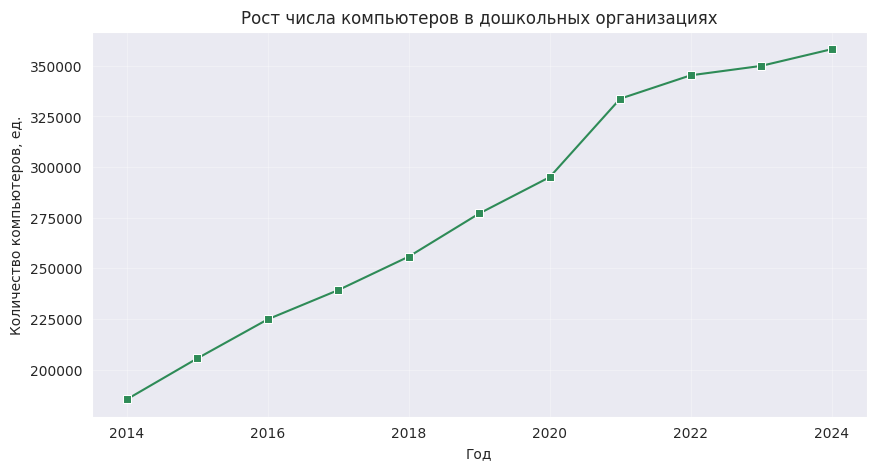

Изменение: +172,859 ед. (+93.3%) за период 2014–2024


In [3]:
# Анализ количества персональных компьютеров

df3 = pd.read_excel(file_path, sheet_name='3')
years_row = df3.iloc[2]
comp_data_row = df3.iloc[3]

comp_years_data = {int(years_row[i]): comp_data_row[i] for i in range(len(years_row)) if pd.notna(years_row[i]) and pd.notna(comp_data_row[i])}
comp_years_data = dict(sorted(comp_years_data.items()))

df_pc = pd.DataFrame(list(comp_years_data.items()), columns=['Год', 'Компьютеры, ед.'])

# Визуализация
def plot_pcs(df):
    plt.figure(figsize=(10,5))
    sns.lineplot(data=df, x='Год', y='Компьютеры, ед.', marker='s', color='seagreen')
    plt.title('Рост числа компьютеров в дошкольных организациях')
    plt.xlabel('Год')
    plt.ylabel('Количество компьютеров, ед.')
    plt.grid(True, alpha=0.3)
    plt.show()

plot_pcs(df_pc)

# Оценка роста
start_val, end_val = df_pc.iloc[0,1], df_pc.iloc[-1,1]
change = end_val - start_val
change_percent = (change / start_val) * 100
print(f'Изменение: {change:+,.0f} ед. ({change_percent:+.1f}%) за период {df_pc.Год.min()}–{df_pc.Год.max()}')